# Basic Stochastic Models

# Simulation


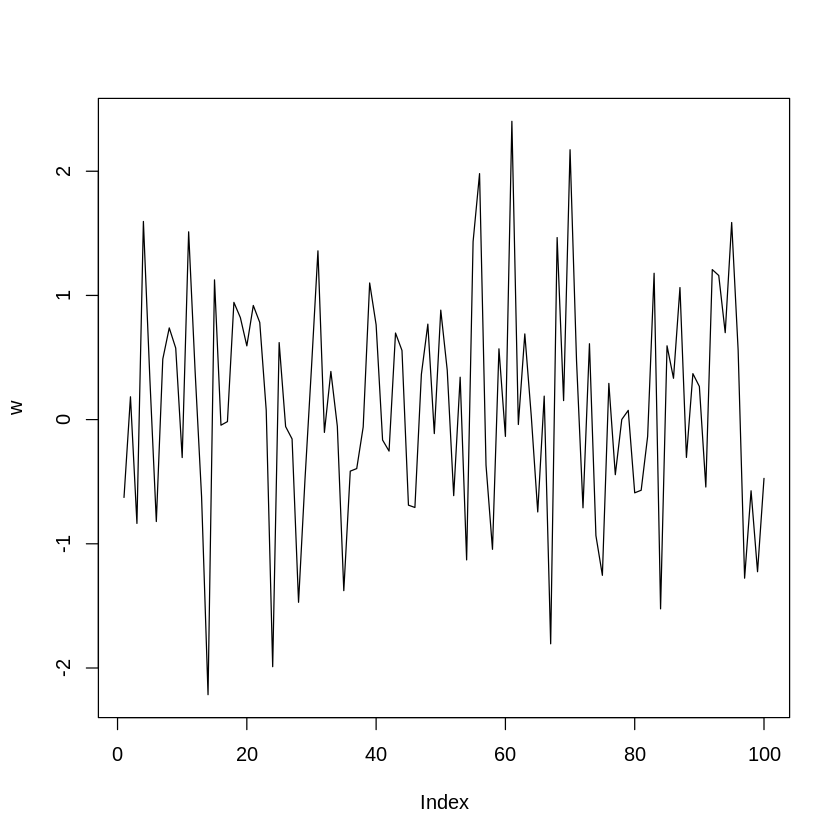

In [1]:
set.seed(1)
w <- rnorm(100)# simulan 100 variables normales independientes, es equivalente
               # a simular serie de sonido blanco de largo 100
plot(w, type='l')


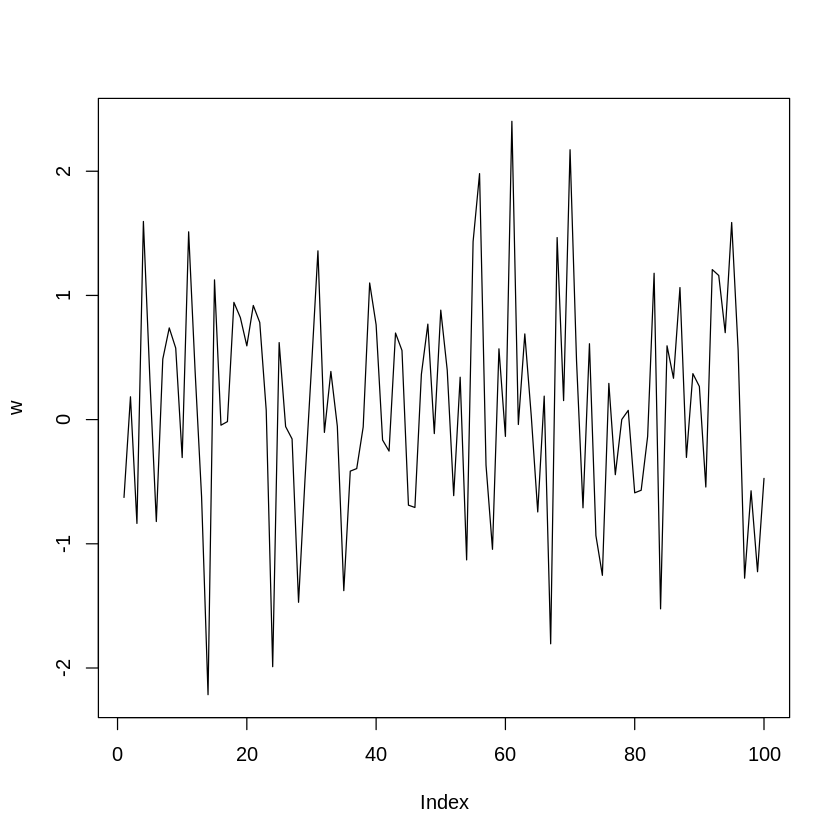

In [2]:
set.seed(1); w <- rnorm(100); plot(w, type='l')# Esto es lo mismo que lo anterior


[1] 0.8067621

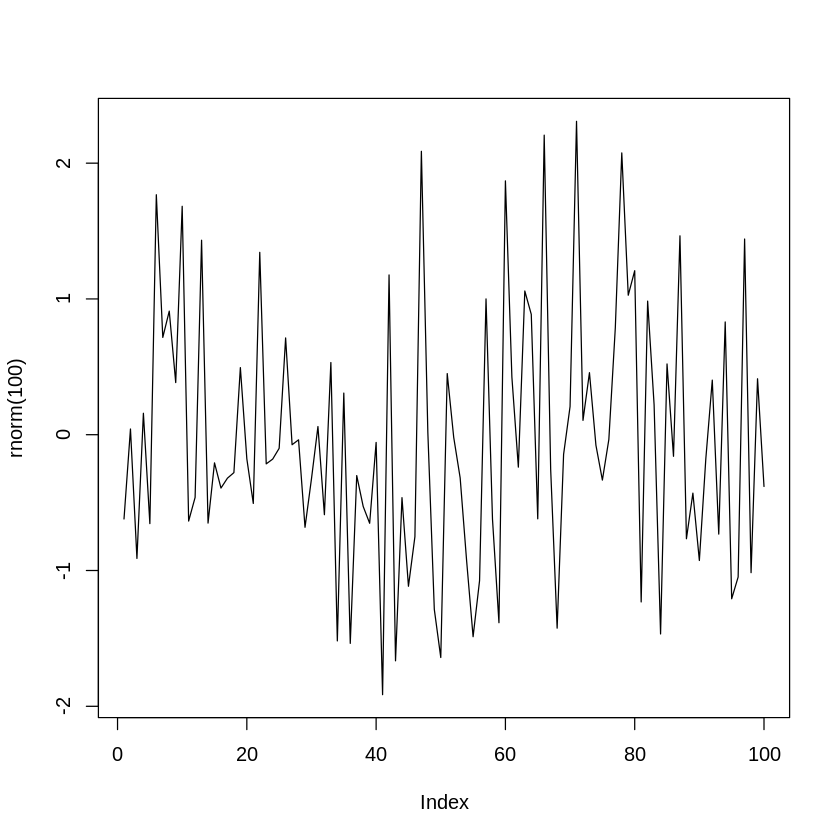

In [3]:
var(w)

plot(rnorm(100), type='l')# es lo mismo que lo anterior pero al no tener la funcion set.seed() el arranque varía con diferentes
                          # datos simulados


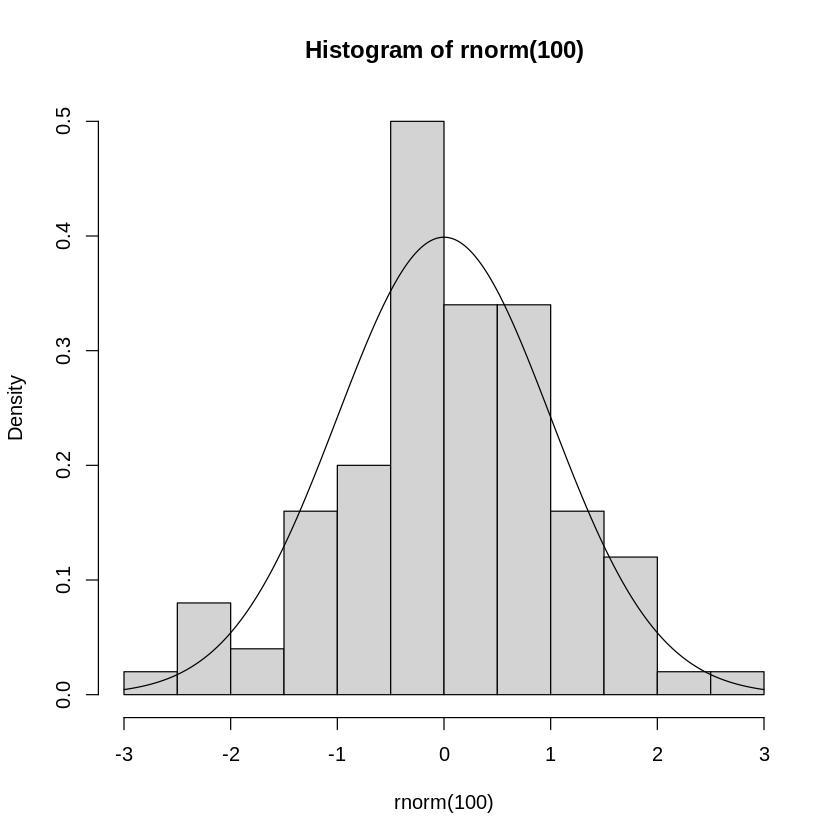

In [4]:
x <- seq(-3,3, length=1000)
hist(rnorm(100), prob=T); points(x, dnorm(x), type='l')


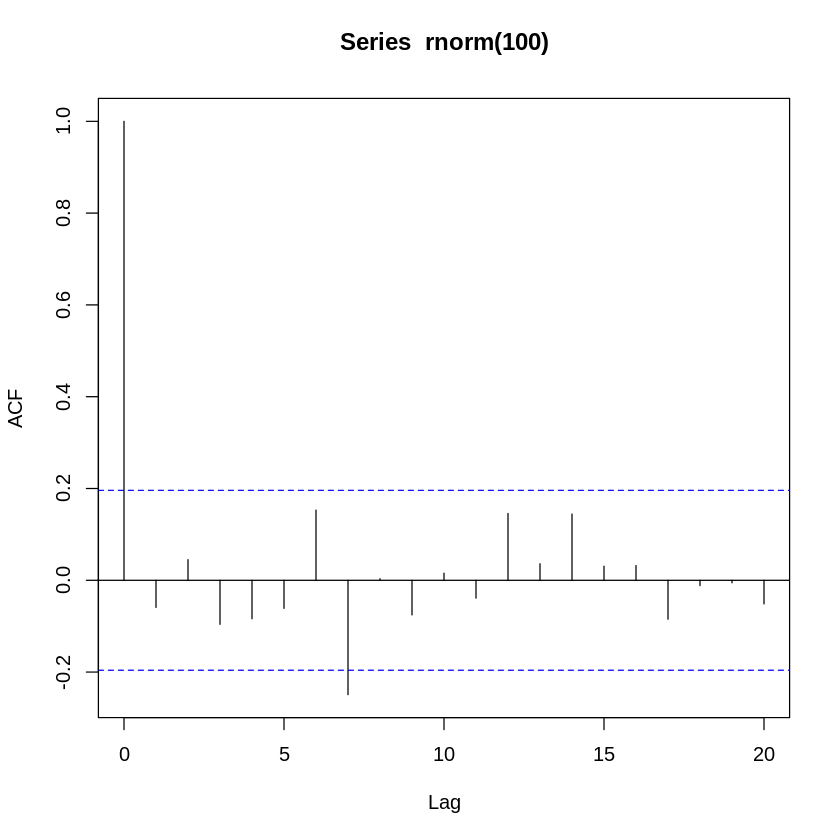

In [5]:
# Simulated white noise data will not have autocorrelations that are exactly zero (when k != 0) because of sampling variation.

set.seed(2); acf(rnorm(100))

# En el lag 7 se ve que la autocorrelación no es cero.

# Random walks

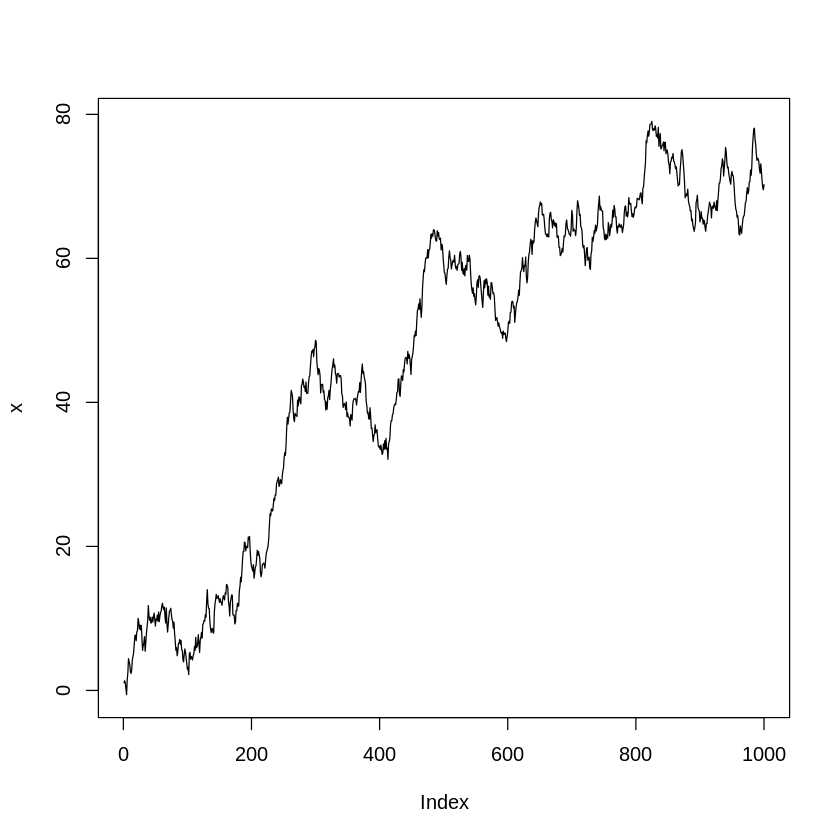

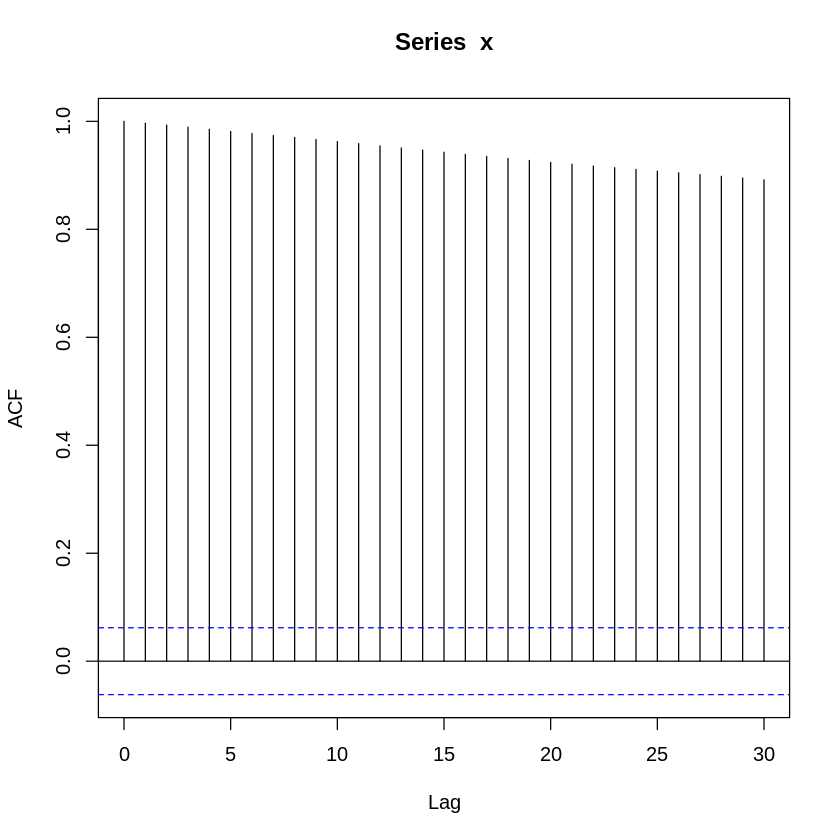

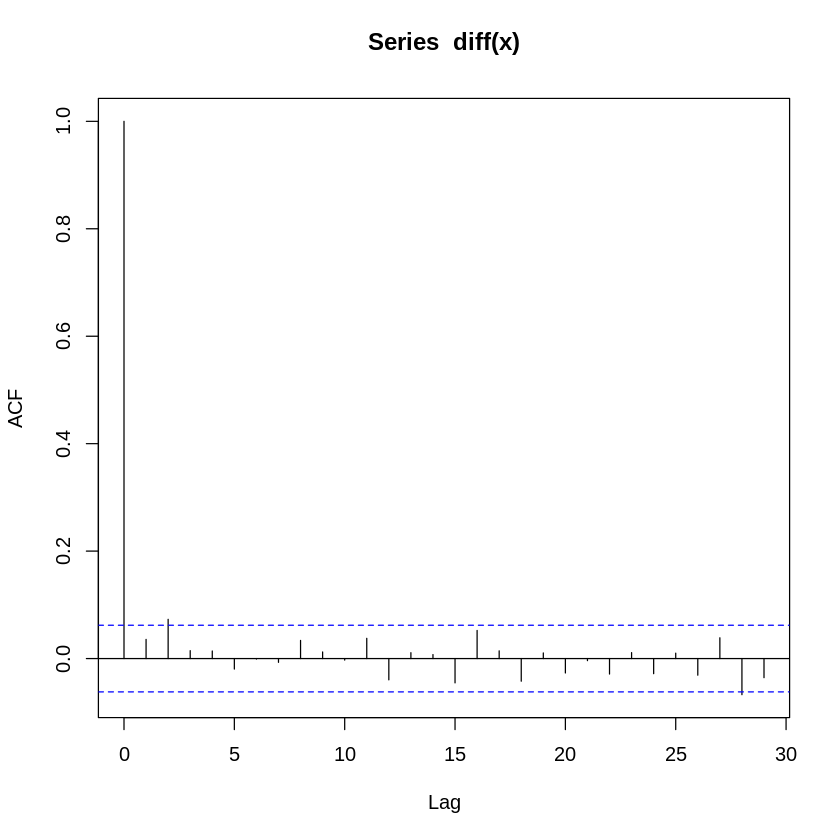

In [6]:
x <- w <- rnorm(1000)# This command places a white noise series into w and uses this series to initialise x

for (t in 2:1000) x[t] <- x[t-1] + w[t]# The ‘for’ loop generates the random walk

plot(x, type = 'l')

acf(x)# correlograma

acf(diff(x))# autocorrelción de la derivada primera de x

# El resultado del correlograma muestra que la variable x sigue una random walk.


[1] 2.9243 2.9422 3.1719 3.2542

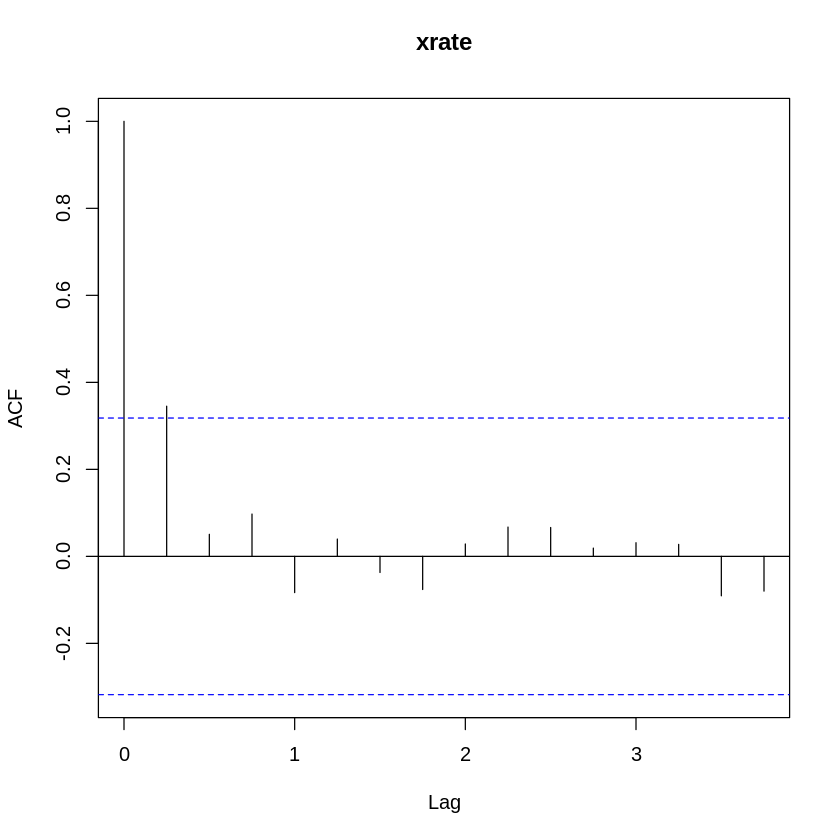

In [7]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/pounds_nz.dat'
Z <- read.table(www, header = T)
Z[1:4, ]
Z.ts <- ts(Z, st = 1991, fr = 4)

acf(diff(Z.ts))


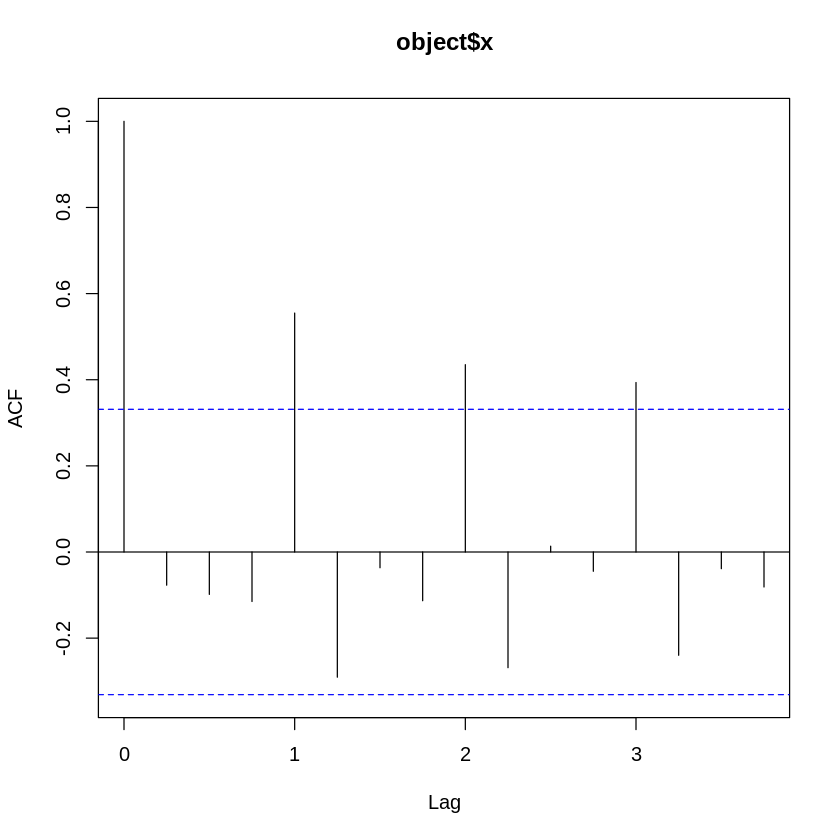

In [8]:
# Esto no lo entiendo bien: 

# An additional term can be added to the random walk model using the Holt-Winters procedure, 
# allowing the parameter β to be non-zero but still forcing the seasonal term γ to be zero:

Z.hw <- HoltWinters(Z.ts, alpha = 1, gamma = 0)
acf(resid(Z.hw))

# Imagino que lo que dice es que le ajusto un modelo un poco más complejo para que se ajuste mejor a los datos, pero que la estacinalidad
# la mantengo controlada o a raya con el coeficiente = 0.

In [9]:
Z.hw$alpha; Z.hw$beta

1- Z.hw$beta

[1] 1

[1] 6.610696e-05

[1] 0.9999339

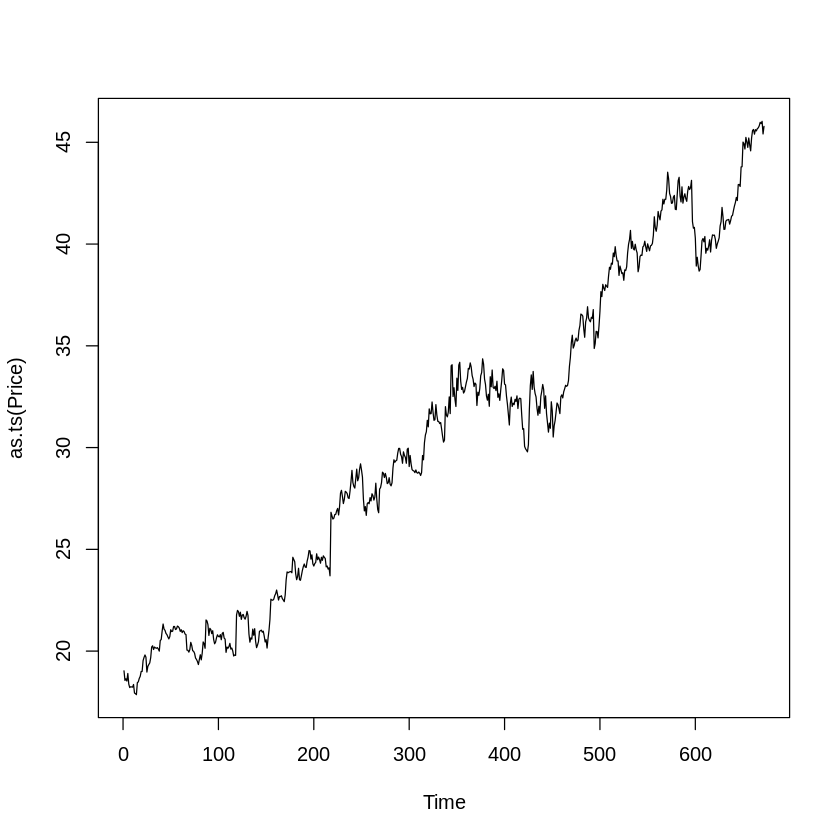

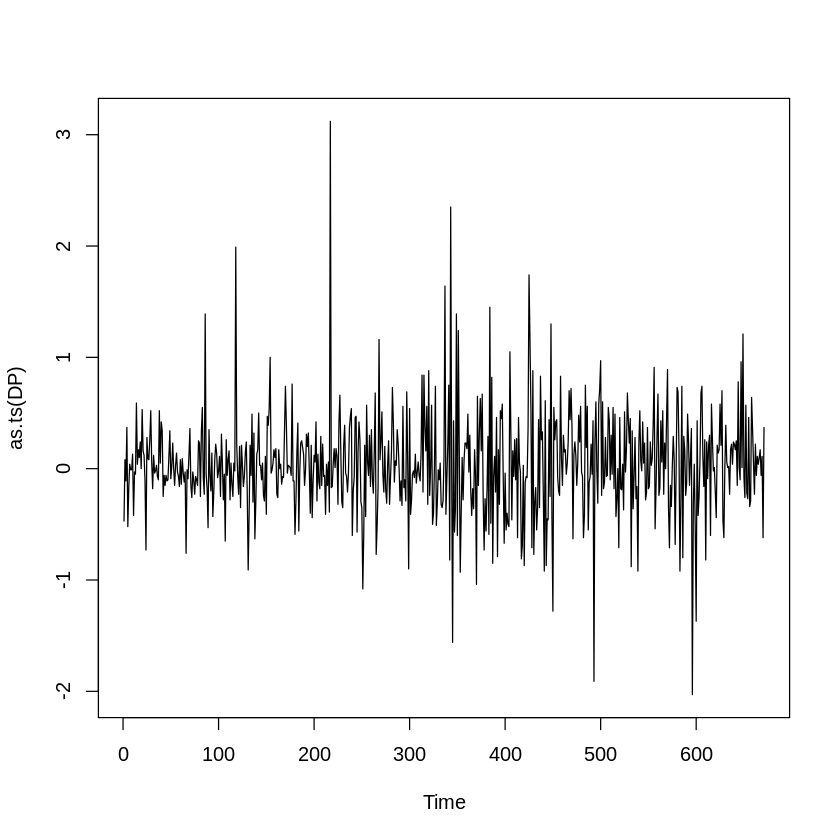

[1] 0.03986587

[1] 0.4596295

[1] 0.004378275 0.075353468

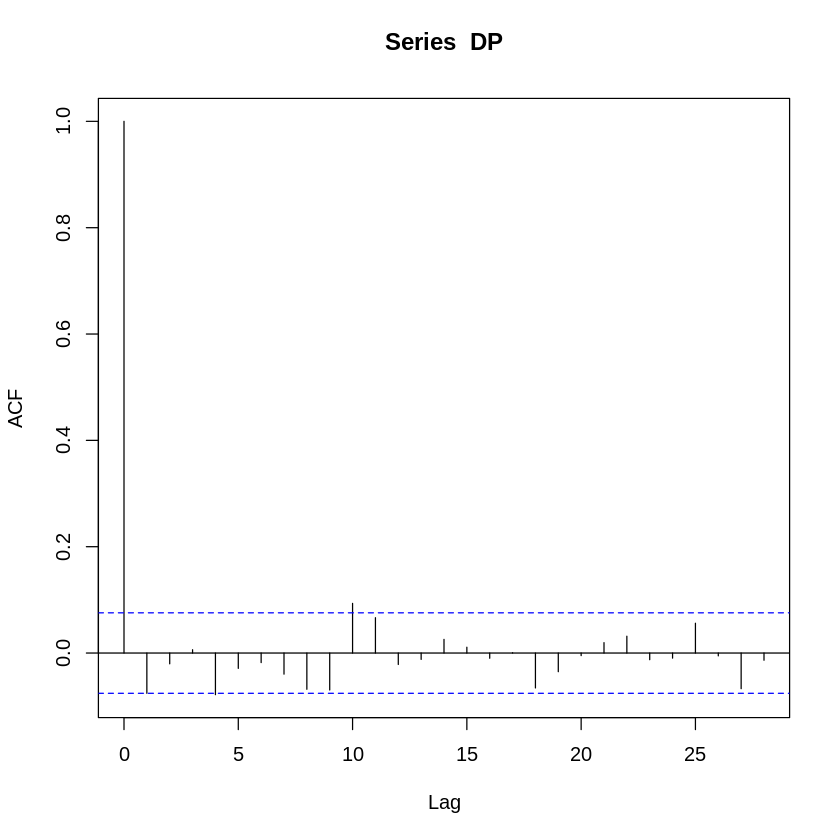

In [10]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/HP.txt'
HP.dat <- read.table(www, header = T) ; attach(HP.dat)

# as.ts: Converts a Serie object to a Time-Series (ts) one.

plot (as.ts(Price))
DP <- diff(Price) ; plot (as.ts(DP)) ; acf (DP)

mean(DP)# The mean of the lag 1 de la derivada primera is 0.0399, and this is our estimate of the drift parameter.
sd(DP)# The standard deviation of the 671 of trading days is 0.460


# an approximate 95% confidence interval for the drift parameter is [0.004, 0.075]:
mean(DP) + c(-2, 2) * sd(DP)/sqrt(length(DP))

# Since this interval does not include 0, we have evidence of a positive drift over this period.


# Autoregresive models

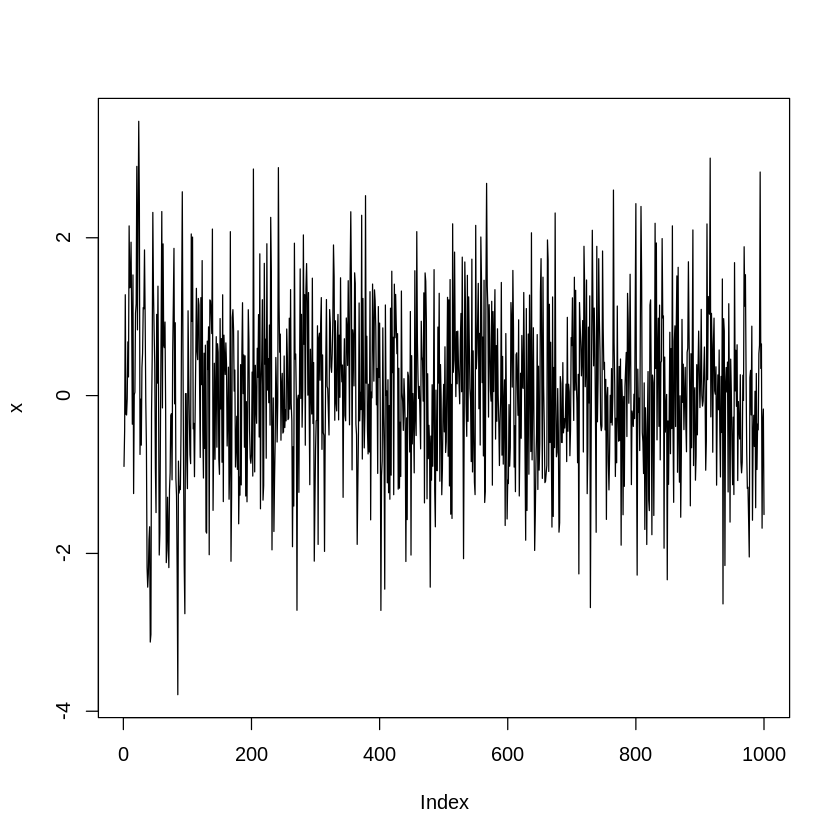

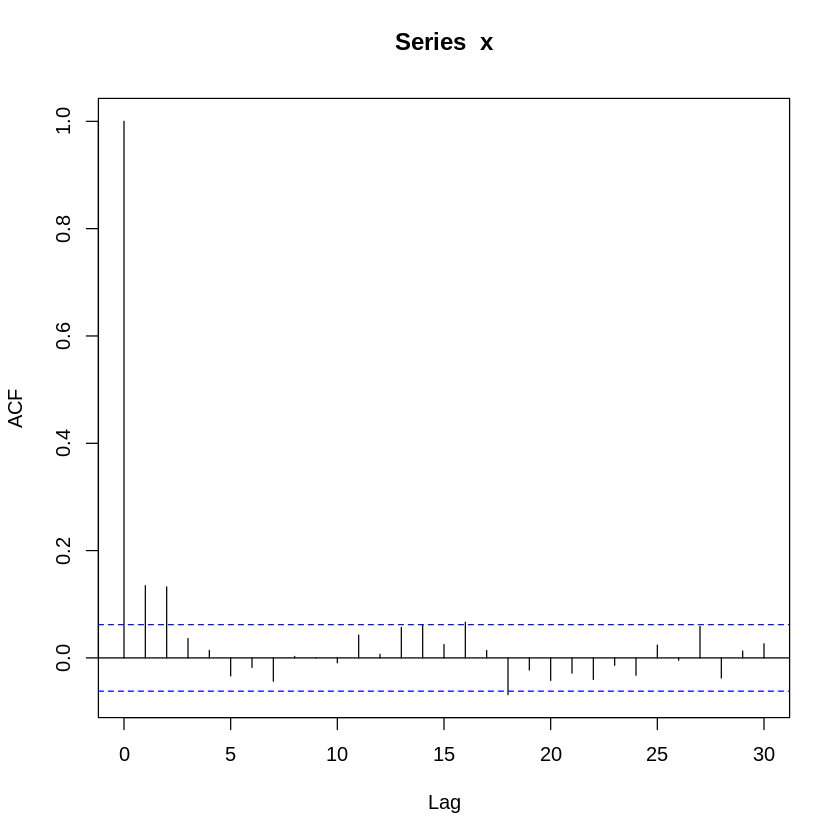

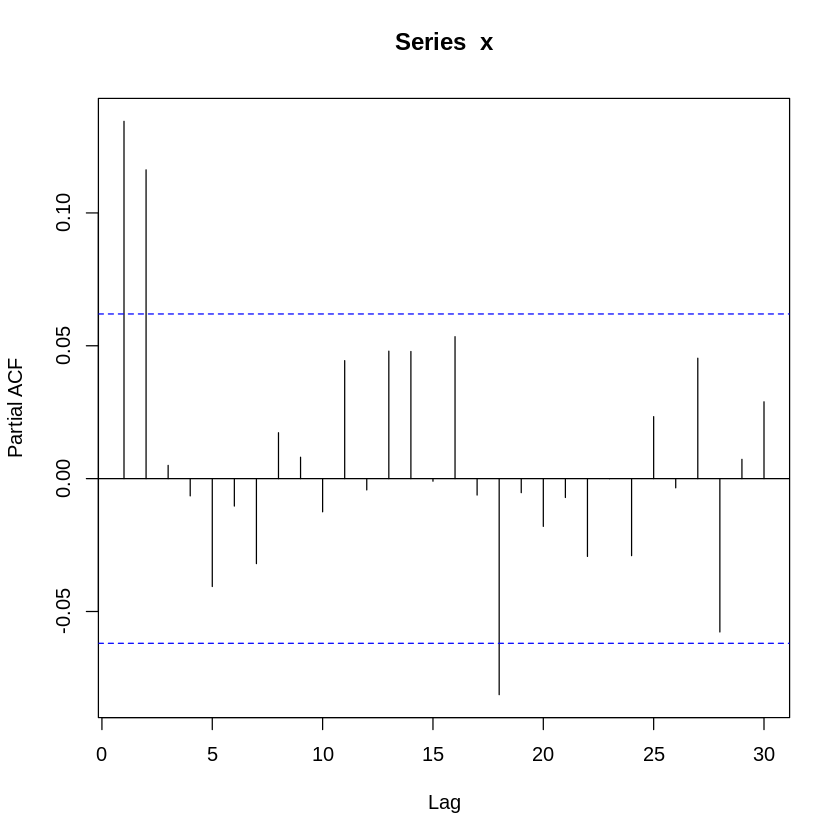

In [11]:
set.seed(2)
x <- w <- rnorm(1000)
for (t in 2:100) x[t] <- 0.7*x[t-1] + w[t]
plot(x, type = 'l')
acf(x)
pacf(x)


In [12]:
x.ar <- ar(x, method = "mle")
x.ar$order

x.ar$ar # me da el alpha
x.ar$ar + c(-2, 2) * sqrt(x.ar$asy.var)


[1] 2

[1] 0.1191087 0.1164028

Warning message in sqrt(x.ar$asy.var):
“NaNs produced”


0.05629515,NaN
NaN,0.1792163


# Exchange rate series: Fitted AR model


In [13]:
Z.ar <- ar(Z.ts)
mean(Z.ts)

Z.ar$order
Z.ar$ar

Z.ar$ar + c(-2, 2) * sqrt(Z.ar$asy.var)


[1] 2.823251

[1] 1

[1] 0.890261

Warning message in c(-2, 2) * sqrt(Z.ar$asy.var):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”


[1] 0.7405097 1.0400123

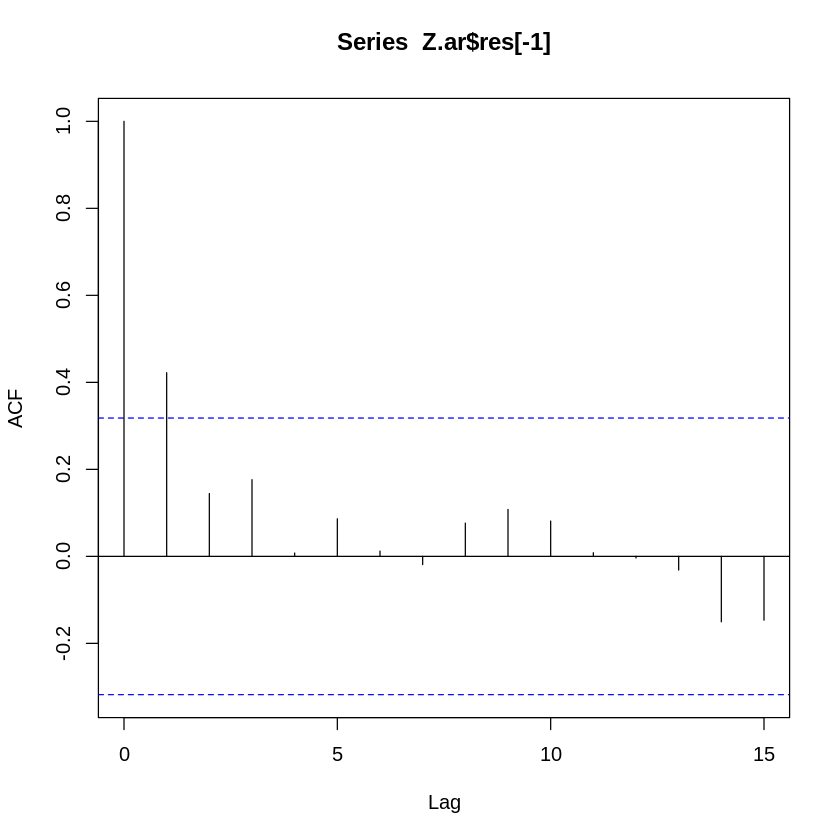

In [14]:
acf(Z.ar$res[-1])


# Global temperature series: Fitted AR model


In [15]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/global.dat'
Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005, 12), fr = 12)


Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”


[1] -0.1382628

[1] 4

[1] 0.58762026 0.01260253 0.11116731 0.26763656

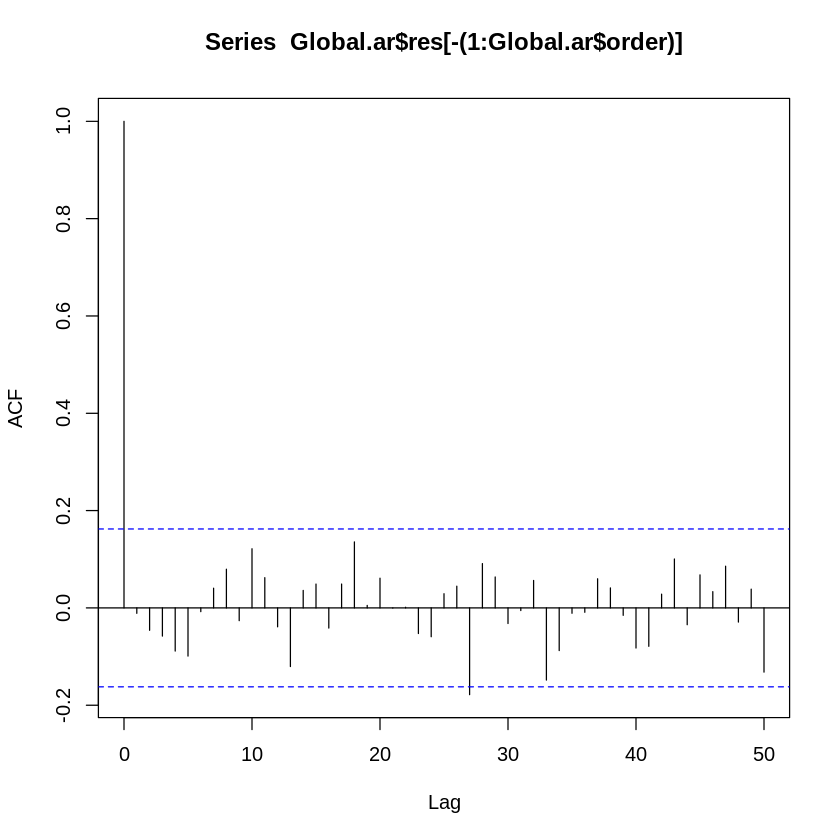

In [16]:
Global.ar <- ar(aggregate(Global.ts, FUN = mean), method = "mle")
mean(aggregate(Global.ts, FUN = mean))
Global.ar$order
Global.ar$ar
acf(Global.ar$res[-(1:Global.ar$order)], lag = 50)


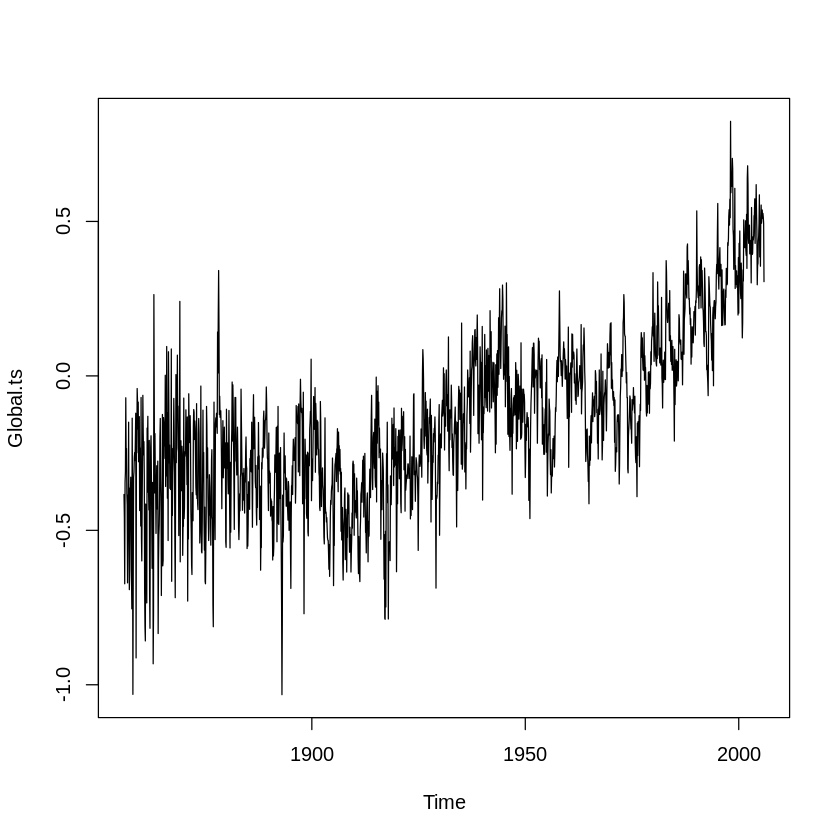

In [17]:
plot(Global.ts)

# As the AR model has no deterministic trend component, the trends in the data can be explained by serial correlation and random variation,
# implying that it is possible that these trends are stochastic (or could arise from a purely stochastic process). 
# Again we emphasise that this does not imply that there is no underlying reason for the trends.If a valid scientific explanation is known,
# such as a link with the increased use of fossil fuels, then this information would clearly need to be included in any future forecasts
# of the series.
